# Ford GoBike Data Visualization
## by Nwangene Sobe-Olisa


## Investigation Overview

> In this investigation, i'll be looking at the relationship between duration of trips and DateTime, Riders age, Riders gender and customer type. The Final goal is to answer the question: Which demograph averages out the highest ride duration per trip.

## Dataset Overview

>  The data consists of information about 183,412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area. A look at the output shows that the dataset has 16 columns and 183,412 rows. Column description is as follows:
* `duration_sec`:this shows the total duration of a bike trip, from start station to end station.
* `start_time`: This records the time each ride commenced.
* `end_time`: This records the time each ride was completed.
* `start_station_id`: records the identity of the station where a ride commenced.
* `start_station_name`: records the name of each station where a ride commenced.
* `start_station_latitude`: records the starting latitudinal coordinate of each ride.
* `start_station_longitude`: records the starting longitudinal coordinate of reach ride.
* `end_station_id`: records the identity of the station where each ride ended.
* `end_station_latitude`: records the end latitudinal coordinate of each ride.
* `end_station_longitude`: records the end longitudinal coordinate of each ride.
* `bike_id`: records the identity of the each bike.
* `user_type`: records the type of user(subscriber or non-subscriber) taking the ride.
* `member_birth_year`: records the birth year of each user.
* `member_gender`: records the gender of each user.
* `bike_share_for_all_trip`:records the if a ride was shared or not.

> About 17,000 data points were removed from the analysis due to inconsistencies or missing value. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('../data/201902-fordgobike-tripdata.csv')

In [3]:
# so let's create a copy to be used for the analysis
df = bike.copy()

# convert 'bike_share_for_all_trip', 'member_gender', 'user_type' to categorical type as the content are categorical
category_var_dict = {'bike_share_for_all_trip': ['No','Yes'],
                    'member_gender': ['Male','Other','Female'],
                    'user_type': ['Customer', 'Subscriber']}

for var in category_var_dict:
    category_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = category_var_dict[var])
    df[var] = df[var].astype(category_var)

# to prevent null values error, we drop them
df.dropna(inplace=True)

# indexing the columns 
cols = df.columns[1:3]

# converting the indexed columns to datetime
df[cols] = df[cols].apply(pd.to_datetime, errors='coerce')
# Giving max value to member_birth_year as above 100years can't logically ride
df=df[df.member_birth_year > 1919] 

# Extracting the index columns to dt
df['start_year'] = df['start_time'].dt.year
#df['start_month'] = df['start_time'].dt.month_name()
df['start_day'] = df['start_time'].dt.day_name()
df['start_hr'] = df['start_time'].dt.hour
df['start_hr'] = df['start_hr'].astype(str)

#df['end_year'] = df['end_time'].dt.year
#df['end_month'] = df['end_time'].dt.month_name()
df['end_day'] = df['end_time'].dt.day_name()
df['end_hr'] = df['end_time'].dt.hour
df['end_hr'] = df.end_hr.astype(str)


# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day' : ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)


# first, we create an age column
df['age'] = df['start_year'] - df['member_birth_year']
# using pandas_cut function to cut the age column.
# create the bin_edges that will be used to cut the data into groups.
bin_edges = [1, 22, 38.0, 54.0, 100]

# create labels for the new categories.
# Gen_Z(1-22), Milennials(23-38.0), Gen_X(38.0-54.0), Bloomers(54-100)
bin_names = ['Gen Z', 'Milennials', 'Gen X', 'Bloomers']

# puting the pandas_cut function to use
df['age_groups'] = pd.cut(df['age'], bin_edges, labels = bin_names)

# drop start and end time columns
df.drop(['start_time', 'end_time', 'age', 'member_birth_year', 'start_year'], axis=1, inplace=True)

## Rides Frequency
Most trips last for around 500-600(sec)

## Distribution of Rides by Days

Thursdays followed by Tuesdays recorded the highest number of rides while weekends (Saturdays and Sundays) recorded the lowest number of ride.


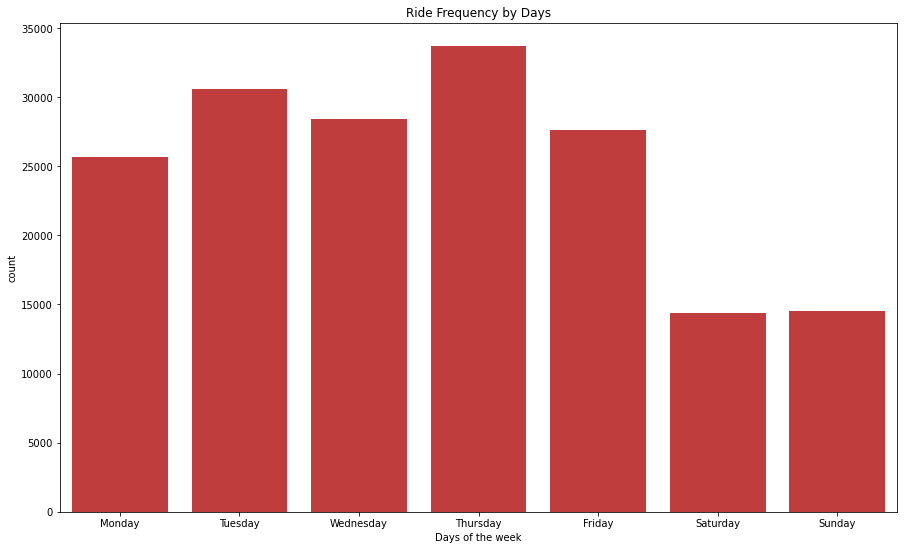

In [4]:
plt.figure(figsize = (15,9))
sb.countplot(data = df, x = 'start_day', color = sb.color_palette()[3])
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

## DIstribution of Rides by Hours

On an hourly bases, most rides were taken around 8th and 9th hours (for morning) and 17th to 18th hours (for evening). This distribution may be linked to the morning and evening rush hours.

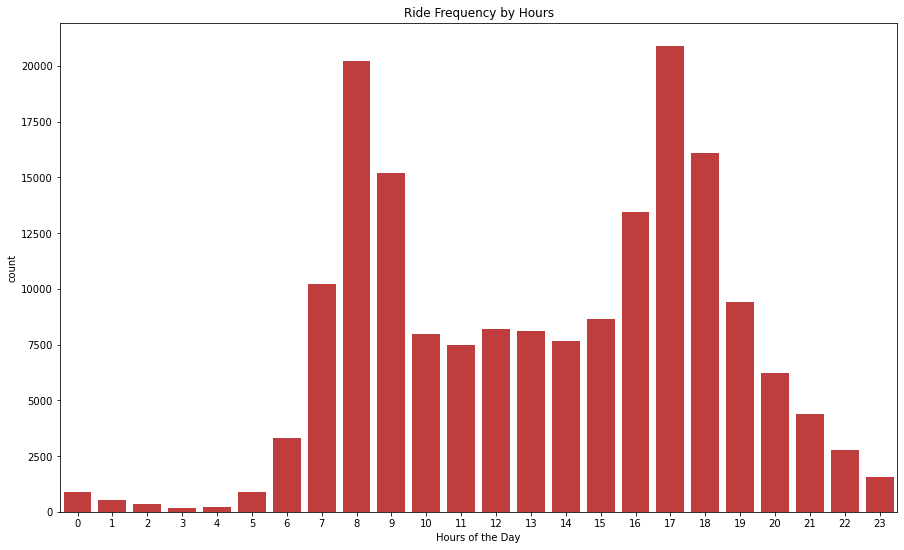

In [5]:
plt.figure(figsize = (15,9))
sb.countplot(data = df, x = 'start_hr', color = sb.color_palette()[3])
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

## Distribution of Riders by Age

71% of the riders are millenials (23-38)

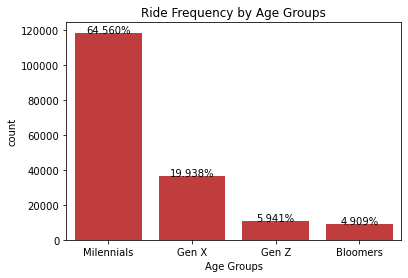

In [6]:
ax = sb.countplot(data = df, x = 'age_groups',  color= sb.color_palette()[3], order = df.age_groups.value_counts().index)

total = len(bike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.5
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('Age Groups')
plt.title('Ride Frequency by Age Groups')
plt.show()

## Distribution of Riders by Gender
Majority of the riders are male


<function matplotlib.pyplot.show(close=None, block=None)>

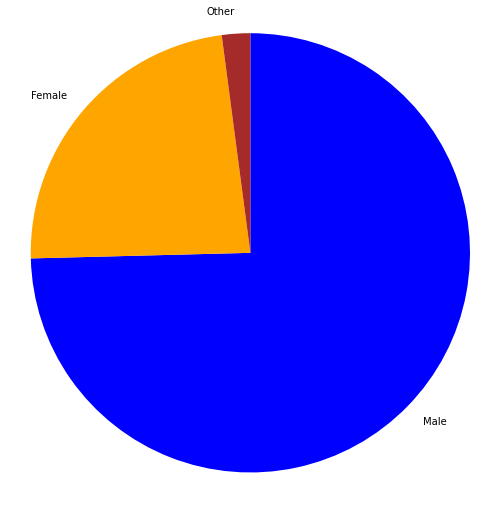

In [7]:
sorted_counts = bike['member_gender'].value_counts()
plt.figure(figsize = (15,9))
# plotting the pie chart 
plt.pie(sorted_counts, labels=sorted_counts.index, 
        colors=['blue', 'orange', 'brown'], startangle=90, counterclock=False)
plt.axis('square');
plt.show

## Distribution of Riders by User type
Subscribers make up over 90% of users for the month in view.

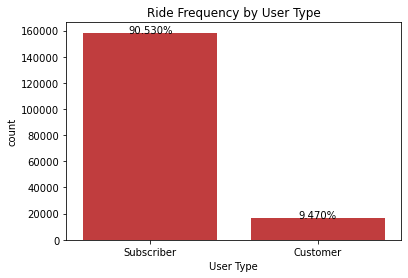

In [8]:
ax = sb.countplot(data = df, x = 'user_type',  color=sb.color_palette()[3], order=df.user_type.value_counts().index)


total = len(df)

for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('User Type')
plt.title('Ride Frequency by User Type')
plt.show;

> So far, data shows that a large majority of riders are Male subscribers within the ages of 18-37 and mostly rides on Thursdays and Tuesdays around 8th-9th hour of the morning and 17th to 18th hour of the evening.

> Computing for the user demograph that averages out the longest ride.

## Average Ride Duration by Age group

This shows that on the average, Gen Z Trips are longest of all the other Age groups

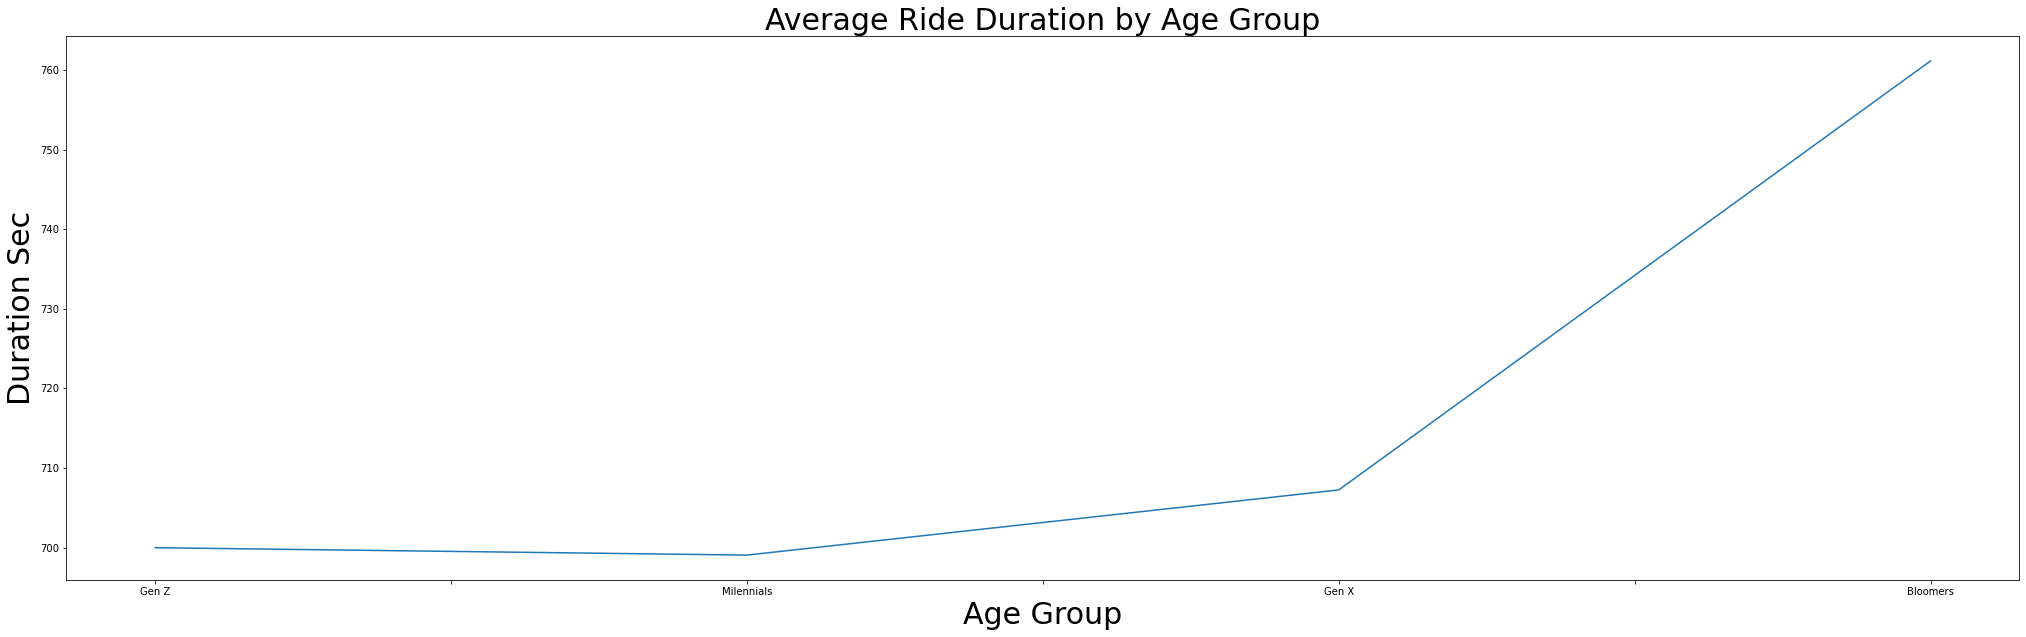

In [9]:
# duration_sec vs age_groups
# checking the average ride duration per age groups
# using groupby to arrange duration_sec and age groups
df_AD = df.groupby('age_groups')['duration_sec'].mean()#.reset_index()

# defining a function to plot the relationship
def plot2 (df, xlabel, ylabel, title):
    df.plot(kind = 'line', figsize=(35,10))
    plt.xlabel("{}".format(xlabel), fontsize = 30)
    plt.ylabel("{}".format(ylabel), fontsize = 30)
    plt.title(label = title, fontsize = 30)
    plt.legend;
    plt.show()

# calling the function
plot2(df_AD, 'Age Group', 'Duration Sec', 'Average Ride Duration by Age Group')

## Average Trip Duration Across Week days and Genders

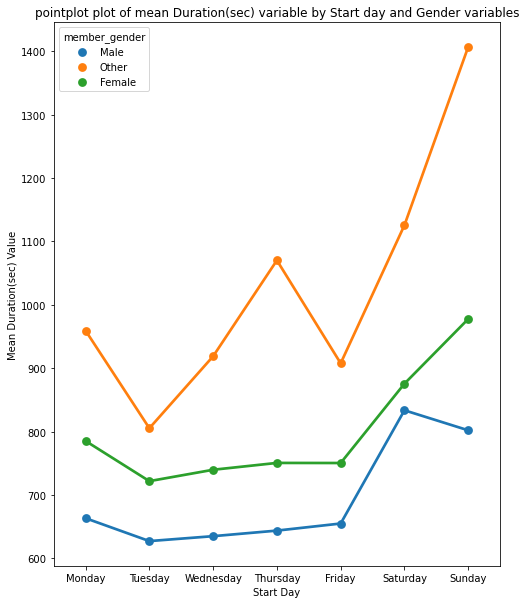

In [10]:
fig = plt.figure(figsize = [8, 10])
mean_df = df.groupby(['start_day', 'member_gender']).mean().reset_index()

# Plot the bar plot
sb.pointplot(x='start_day', y='duration_sec', hue='member_gender', data=mean_df)

# Add title and labels
plt.title('pointplot plot of mean Duration(sec) variable by Start day and Gender variables')
plt.xlabel('Start Day')
plt.ylabel('Mean Duration(sec) Value')

# Show plot
plt.show()

> Having feature engineered the start and end days, age group from the already dataset, the following conclusions can be made:
* The average duration of trips is about 510 seconds.
* More trips were registered for Thursday and Tuesday than other days in the week, whilst weekends registered the least. More trips were registered around the 8th and 9th hour in the morning and 17th to 18th hour in the evening. So it would be nice to have more rides available for these peak days and periods.
* large chunck of trips were taken by male Subscribers.
* In terms of average duration travelled the Bloomers age group have the highest duration and weekends seem to be their most perferred time. But due to the general low rides on the weekends, we can let this slide.

In [11]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 826483 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_